In [1]:
#Binning and Binarization- day 32

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('datasets/train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df.dropna(inplace=True)  #drop null values

In [12]:
df.shape

(714, 3)

In [13]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [14]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.head(3)

Age     Fare
328  31.0  20.5250
73   26.0  14.4542
253  30.0  16.1000

In [17]:
clf=DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6363636363636364

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6317097026604068)

In [48]:
#applying binning
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

In [49]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [50]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [51]:
trf.named_transformers_['first'].n_bins_
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

In [52]:
#forming dataframe
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [53]:
output['age_labels']=pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],
                                     bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [54]:
output.sample(5)

age  age_trf     fare  fare_trf    age_labels        fare_labels
361  29.0      2.0  27.7208       3.0  (25.0, 32.0]     (26.0, 51.479]
51   21.0      1.0   7.8000       0.0  (19.0, 25.0]       (0.0, 7.896]
265  36.0      3.0  10.5000       1.0  (32.0, 42.0]      (7.896, 13.0]
879  56.0      4.0  83.1583       4.0  (42.0, 80.0]  (51.479, 512.329]
632  32.0      3.0  30.5000       3.0  (25.0, 32.0]     (26.0, 51.479]

In [55]:
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6363636363636364

In [56]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6387128325508606


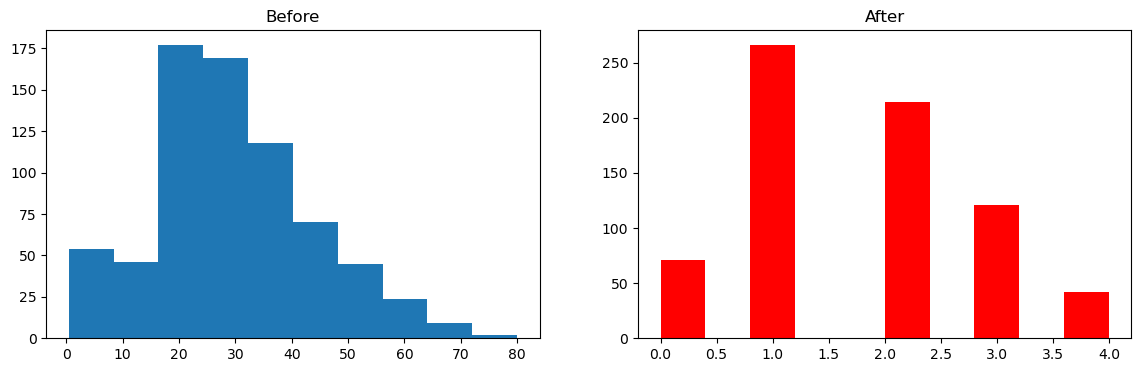

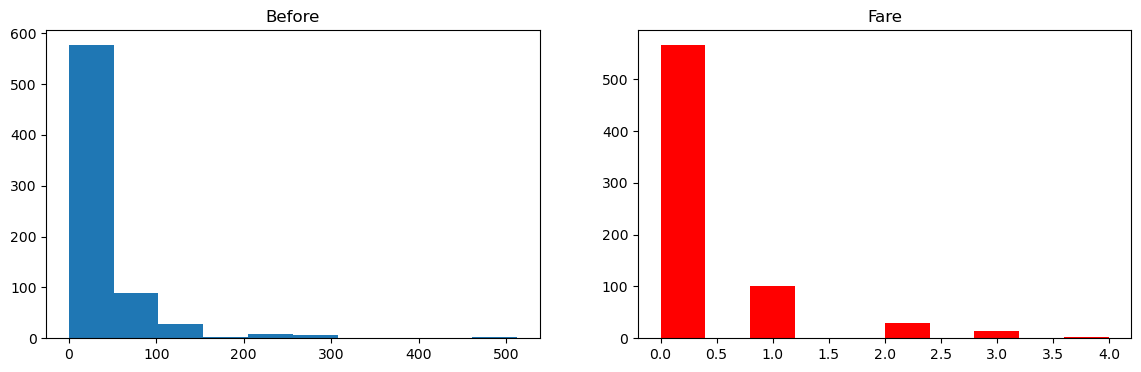

In [59]:
discretize(5,'kmeans')